<a href="https://colab.research.google.com/github/mandananaderi/MLP_Projects_2025/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [2]:
fmnist_data = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[1,]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
        0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215687, 0.53333336, 0.85882354,
        0.84705883, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.8509804 , 0.84313726, 0.99607843,
        0.90588236, 0.627451  , 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.6901961 , 0.87058824, 0.8784314 , 0.83137256,
        0.79607844, 0.7764706 , 0.76862746, 0.78431374, 0.84313726,
        0.8       , 0.7921

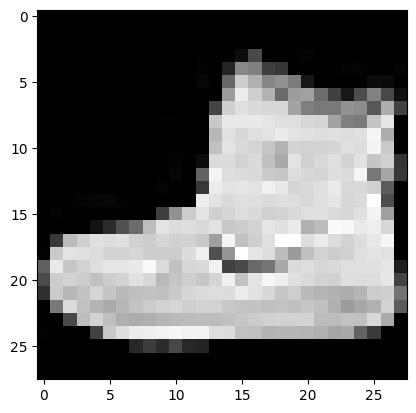

In [6]:
plt.imshow(x_train[0,], cmap='gray')

In [7]:
x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0

In [8]:
x_train[1,]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
        0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215687, 0.53333336, 0.85882354,
        0.84705883, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.8509804 , 0.84313726, 0.99607843,
        0.90588236, 0.627451  , 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.6901961 , 0.87058824, 0.8784314 , 0.83137256,
        0.79607844, 0.7764706 , 0.76862746, 0.78431374, 0.84313726,
        0.8       , 0.7921

# Fit Model

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
weights, bias = model.layers[1].get_weights()

In [16]:
weights

array([[ 0.00180512,  0.02219542, -0.04715613, ...,  0.03767069,
         0.05071686, -0.06093115],
       [-0.04133134, -0.04290859,  0.00984307, ..., -0.03529632,
        -0.02842918,  0.05670208],
       [ 0.03077075,  0.03581341, -0.06717125, ...,  0.07507671,
         0.04826345, -0.07687584],
       ...,
       [-0.02132052, -0.01567882, -0.02271533, ...,  0.03031614,
         0.0519723 , -0.02228142],
       [-0.0441627 ,  0.07489084, -0.04893133, ..., -0.06386131,
        -0.01771922, -0.00221536],
       [-0.00033794, -0.03257097,  0.00223938, ...,  0.04645658,
         0.00015205,  0.01673743]], dtype=float32)

In [17]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compile

In [18]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit Model

In [19]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6438 - loss: 1.0856 - val_accuracy: 0.8148 - val_loss: 0.5472
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8192 - loss: 0.5239 - val_accuracy: 0.8304 - val_loss: 0.4808
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8402 - loss: 0.4610 - val_accuracy: 0.8363 - val_loss: 0.4601
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8459 - loss: 0.4401 - val_accuracy: 0.8434 - val_loss: 0.4473
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8555 - loss: 0.4120 - val_accuracy: 0.8534 - val_loss: 0.4174
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8629 - loss: 0.3939 - val_accuracy: 0.8534 - val_loss: 0.4118
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8668 - loss: 0.3834 - val_accuracy: 0.8617 - val_loss: 0.3962
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8708 - loss: 0.3712 - 